# PROJET 2 : Concevez une application au service de la santé publique

# Partie 2: Exploitation des données

## SOMMAIRE  <a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#1)<a class="anchor" id="sommaire"></a>
## [CHARGEMENT DES DONNEES](#2)<a class="anchor" id="sommaire"></a>
## [ANALYSE DES VARIABLES](#3)<a class="anchor" id="sommaire"></a>
## [ANALYSE MULTIVARIEE](#4)<a class="anchor" id="sommaire"></a>
## [ANALYSE PCA ET CLUSTERING](#5)<a class="anchor" id="sommaire"></a>

## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="1"></a>

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## [CHARGEMENT DES DONNEES](#sommaire)<a class="anchor" id="2"></a>

In [145]:
data=pd.read_csv('Truncated_Food_data.csv',error_bad_lines=True,low_memory=False)
df=pd.DataFrame(data)
df

,code,nutriscore_grade,product_name,main_category,nutrition-score-fr_100g,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,salt_100g,sodium_100g
0,0000000000100,d,moutarde au moût de raisin,en:mustards,18.0,936.0,5.1,22.0,29.0,8.2,2.2,4.60,1.840
1,0000000000949,b,Salade de carottes râpées,en:seasoned-shredded-carrots,1.0,134.0,0.9,3.9,5.3,0.3,0.1,0.42,0.168
2,0000000001281,d,Tarte noix de coco,en:coconut-pies,14.0,1594.0,4.6,21.9,27.3,22.0,15.5,0.10,0.040
3,0000000002257,b,Salade de macedoine de légumes,en:prepared-vegetables-macedoines,1.0,598.0,1.9,1.0,3.9,12.7,1.0,0.27,0.108
4,0000000005166,c,cuisse de poulet direct au four curry,en:chicken-thighs,4.0,824.0,17.0,0.9,3.0,13.0,4.0,1.10,0.440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362803,9999900002553,e,Chocolat de Couverture Noir,en:dark-chocolates,22.0,2443.0,7.6,26.9,30.7,46.9,28.2,0.03,0.012
362804,9999991042711,c,Riz au lait,en:rice-puddings,7.0,628.0,2.9,14.0,21.0,6.1,4.3,0.08,0.032
362805,9999991042742,d,Mousse au chocolat noir,en:chocolate-mousses,17.0,1448.0,6.0,18.0,19.0,27.0,17.0,0.19,0.076
362806,9999999004360,d,Minis beignets,en:sweet-fritters,15.0,1393.0,7.4,10.4,30.9,20.2,6.0,1.10,0.440


## [ANALYSE DES VARIABLES](#sommaire)<a class="anchor" id="3"></a>

##### Affichage des variables disponibles

Nous allons d'abord visualiser les différentes variables et leur distribution

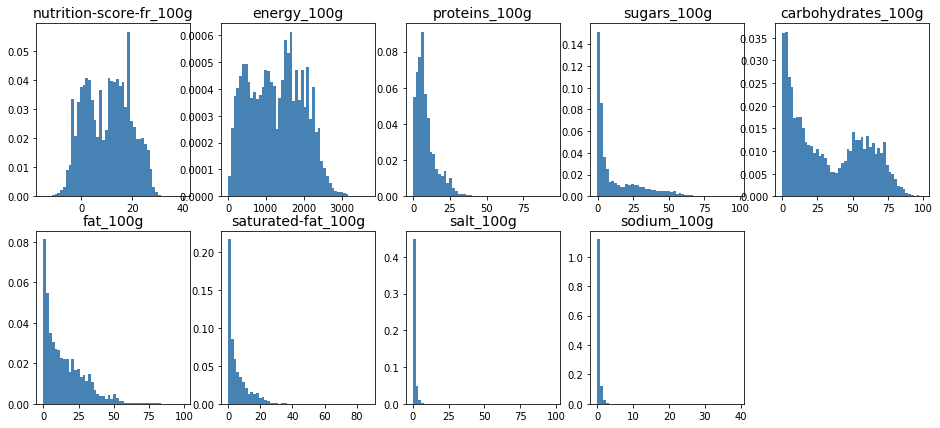

In [4]:
df1=df.drop(columns=['code','product_name','main_category','nutriscore_grade'])
X=df1.values
fig = plt.figure(figsize=(16, 7))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(2,5, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df1.columns[feat_idx], fontsize=14)

Ainsi que leurs box plots

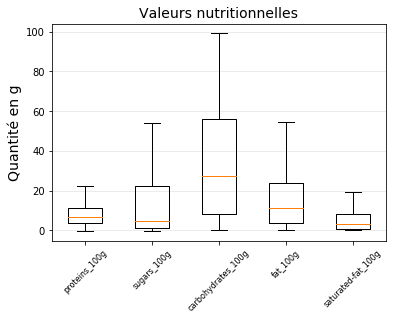

In [303]:
df1=df.drop(columns=['code','product_name','main_category','nutriscore_grade','nutrition-score-fr_100g','energy_100g','salt_100g','sodium_100g'])
X=df1.values
fig, ax = plt.subplots()
h = ax.boxplot(X,0,'')
ax.set_xticklabels(df1.columns,
                    rotation=45, fontsize=8)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.55)
ax.set_title('Valeurs nutritionnelles', fontsize=14)
ax.set_ylabel('Quantité en g', fontsize=14)

plt.show()

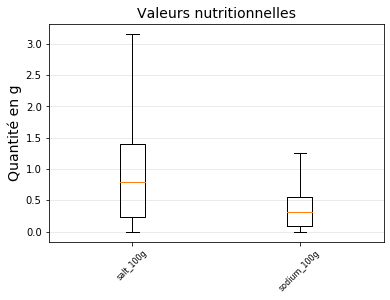

In [305]:
df1=df[['salt_100g','sodium_100g']]
X=df1.values
fig, ax = plt.subplots()
h = ax.boxplot(X,0,'')
ax.set_xticklabels(df1.columns,
                    rotation=45, fontsize=8)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.55)
ax.set_title('Valeurs nutritionnelles', fontsize=14)
ax.set_ylabel('Quantité en g', fontsize=14)
plt.show()

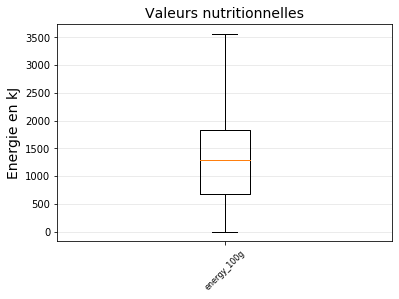

In [302]:
df1=df[['energy_100g']]
X=df1.values
fig, ax = plt.subplots()
h = ax.boxplot(X,0,'')
ax.set_xticklabels(df1.columns,
                    rotation=45, fontsize=8)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.55)
ax.set_title('Valeurs nutritionnelles', fontsize=14)
ax.set_ylabel('Energie en kJ', fontsize=14)
plt.show()

##### Description des variables

In [11]:
df1.describe()

,energy_100g
count,362808.000000
mean,1281.632204
std,696.688672
min,0.000000
25%,674.000000
50%,1297.000000
75%,1833.000000
max,3694.000000


In [12]:
df1.median()

energy_100g    1297.0
dtype: float64

In [13]:
df1.mean()

energy_100g    1281.632204
dtype: float64

##### Analyse des labels

In [14]:
df['main_category'].nunique()

14597

In [325]:
from collections import Counter

def most_common_words(labels):
    words = []
    for lab in labels:
        lab=lab.__str__()
        words += lab.split(" ")
    counter = Counter(words)
    #for word in counter.most_common(20):
        #print(word)
    return counter.most_common(10)

common=most_common_words(df['main_category'].values)

Nous allons représenter un pie chart des catégories les plus fréquentes 

In [326]:
labels=[]
label_values=[]
for i in common:
    labels.append(i[0])
    label_values.append(i[1])
labels2=['most_common','other']
frac=[sum(label_values),df.shape[0]]

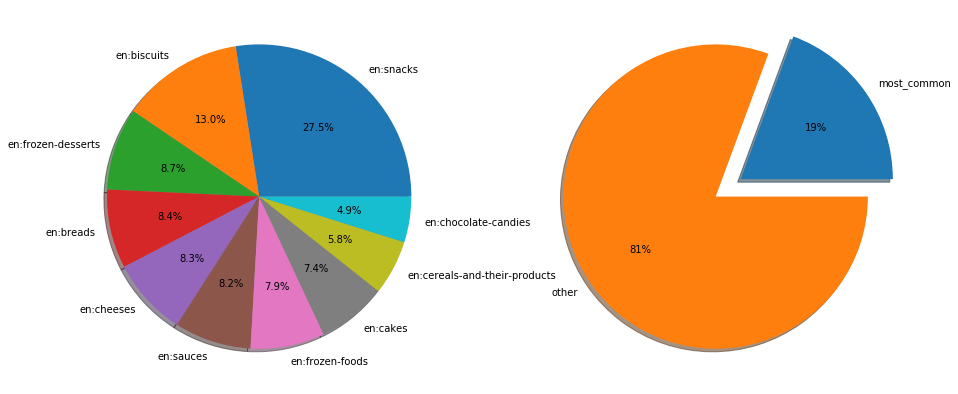

In [328]:
fig, axs = plt.subplots(1,2,figsize=(15, 8))
axs[0].pie(label_values, labels=labels, shadow=True,autopct='%1.1f%%')
axs[1].pie(frac, labels=labels2, autopct='%.0f%%', shadow=True,
              explode=(0.2, 0))
plt.show()

##### Analyse de variance d'une variable qualitative: le nutritiscore

Nous allons représenter la distribution du nutrition grade dans le data set

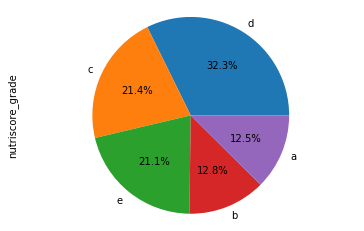

In [311]:
df["nutriscore_grade"].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal') 

plt.show() 

## [ANALYSE MULTIVARIEE](#sommaire)<a class="anchor" id="4"></a>

##### Calcul du tableau de covariance

Visualisons d'abord un tableau de covariance

In [19]:
df1=df.drop(columns=['code','product_name','main_category','nutriscore_grade'])
df1.cov()

,nutrition-score-fr_100g,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,salt_100g,sodium_100g
nutrition-score-fr_100g,78.702784,3973.978062,2.628577,76.927618,65.506867,75.771044,39.973981,2.640191,1.056088
energy_100g,3973.978062,485375.106085,1243.298552,4600.110936,9884.065702,7628.565930,2574.358358,-13.020887,-5.207586
proteins_100g,2.628577,1243.298552,61.133494,-34.498660,-34.326537,22.806721,6.721082,2.216496,0.886654
sugars_100g,76.927618,4600.110936,-34.498660,280.650406,258.682473,25.117342,29.563870,-6.057315,-2.423006
carbohydrates_100g,65.506867,9884.065702,-34.326537,258.682473,658.934181,-8.713304,3.636258,-5.277051,-2.110769
fat_100g,75.771044,7628.565930,22.806721,25.117342,-8.713304,203.019185,65.569200,0.981681,0.392649
saturated-fat_100g,39.973981,2574.358358,6.721082,29.563870,3.636258,65.569200,44.419277,-0.379860,-0.151933
salt_100g,2.640191,-13.020887,2.216496,-6.057315,-5.277051,0.981681,-0.379860,4.535423,1.814173
sodium_100g,1.056088,-5.207586,0.886654,-2.423006,-2.110769,0.392649,-0.151933,1.814173,0.725677


En normalisant les données au préalable nous obtenons le tableau des r^2

In [20]:
df2=pd.DataFrame(data=StandardScaler().fit_transform(df1))
df2.columns=df1.columns
df2.cov()

,nutrition-score-fr_100g,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,salt_100g,sodium_100g
nutrition-score-fr_100g,1.000003,0.642973,0.037895,0.517614,0.287655,0.599433,0.676080,0.139744,0.139744
energy_100g,0.642973,1.000003,0.228243,0.394138,0.552684,0.768488,0.554429,-0.008776,-0.008775
proteins_100g,0.037895,0.228243,1.000003,-0.263379,-0.171029,0.204718,0.128978,0.133113,0.133120
sugars_100g,0.517614,0.394138,-0.263379,1.000003,0.601540,0.105226,0.264785,-0.169781,-0.169786
carbohydrates_100g,0.287655,0.552684,-0.171029,0.601540,1.000003,-0.023823,0.021254,-0.096530,-0.096527
fat_100g,0.599433,0.768488,0.204718,0.105226,-0.023823,1.000003,0.690473,0.032351,0.032349
saturated-fat_100g,0.676080,0.554429,0.128978,0.264785,0.021254,0.690473,1.000003,-0.026763,-0.026761
salt_100g,0.139744,-0.008776,0.133113,-0.169781,-0.096530,0.032351,-0.026763,1.000003,0.999998
sodium_100g,0.139744,-0.008775,0.133120,-0.169786,-0.096527,0.032349,-0.026761,0.999998,1.000003


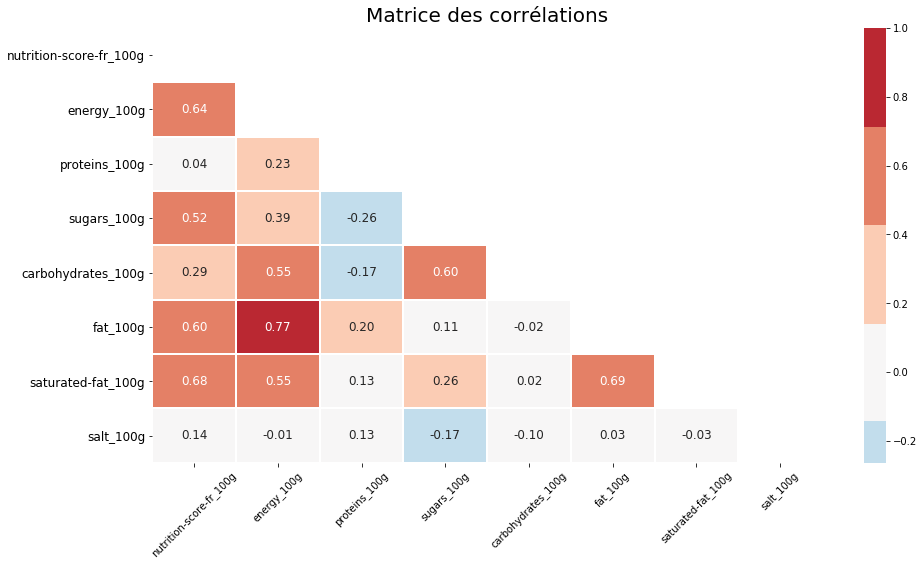

In [215]:
# Matrice des corrélations
corr = df1.corr()

# heatmap de la matrice de corrélation
plt.figure(figsize=(15,8))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, center=0, cmap=sns.color_palette("RdBu_r", 7), linewidths=1, 
            annot=True, annot_kws={"size":12}, fmt=".02f")

plt.title('Matrice des corrélations', fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=12)
plt.show()


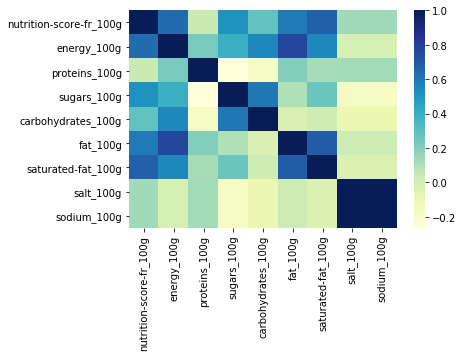

In [22]:
ax = sns.heatmap(df2.cov(),cmap="YlGnBu")

Nous observons qu'il y a des données fortement corrélées comme le sel et le sodium (ce qui est normal puisque l'on a la formule sel=sodium*2.5). Les values fat, saturated fat semblent assez bien corrélées également. 

##### Calcul de la variance pour la variable nutriscore

In [23]:
X = df['nutriscore_grade'] # qualitative
df1=df.drop(columns=['code','product_name','main_category','nutriscore_grade'])

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
for i in df1.columns:
    print(str(i)+': '+str(eta_squared(X,df1[i])))
    

nutrition-score-fr_100g: 0.9272414218858446
energy_100g: 0.3580729151831091
proteins_100g: 0.018513186294965178
sugars_100g: 0.2469540204518693
carbohydrates_100g: 0.0723764319301473
fat_100g: 0.3187735864151482
saturated-fat_100g: 0.43400489723821095
salt_100g: 0.030700664493275284
sodium_100g: 0.030699306319677315


Le nutrition score est une version quantitative du nutriscore, il est donc logique d'avoir une variance élevée. 
Nous observons qu'il y a d'autres variables qui semble présenter une variance positive importante avec le nutriscore comme energy_100g et saturated-fat et d'autres beaucoup moins comme salt_100g ou carbohydrates_100g

Nous pouvons affiner notre analyse du nutriscore en affichant un tableau de contingence.

In [24]:
df1=df.drop(columns=['code','product_name','main_category'])
X = "nutriscore_grade"

cont = df1.pivot_table(index=X,aggfunc=np.mean)
cont

,carbohydrates_100g,energy_100g,fat_100g,nutrition-score-fr_100g,proteins_100g,salt_100g,saturated-fat_100g,sodium_100g,sugars_100g
nutriscore_grade,,,,,,,,,
a,28.131715,780.831341,4.204141,-3.197025,8.692149,0.410120,0.634433,0.164028,3.585382
b,21.652374,717.079341,5.870465,1.001704,7.577556,0.683624,1.218271,0.273452,4.752801
c,29.210718,1032.544457,10.751041,5.912140,7.874773,1.072589,2.494502,0.429036,9.318104
d,34.657718,1467.786772,19.038466,14.208819,10.191016,1.514629,6.451539,0.605832,13.976190
e,43.744814,1887.566377,27.050542,22.269365,7.986425,1.204105,12.972818,0.481644,27.863277


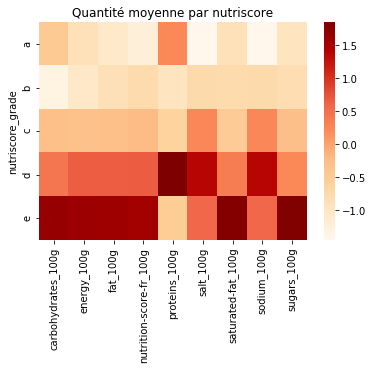

In [315]:
df2=pd.DataFrame(data=StandardScaler().fit_transform(cont))
df2.columns=cont.columns
df2.index=cont.index
ax.set_title('Quantité moyenne par nutriscore',fontsize=13)
ax = sns.heatmap(df2,cmap="OrRd")

Les valeurs nutritionnelles moyennes sont très variables en fonction du nutriscore. Ainsi le grade A contient moins de sucres et de gras et est moins calorique, tandis que le grade E est riche en sucre, en gras et pauvre en protéines. 

##### One-way ANOVA

Nous allons effectuer l'ANOVA du nutriscore sur un exemple de valeur nutritionnelle, 

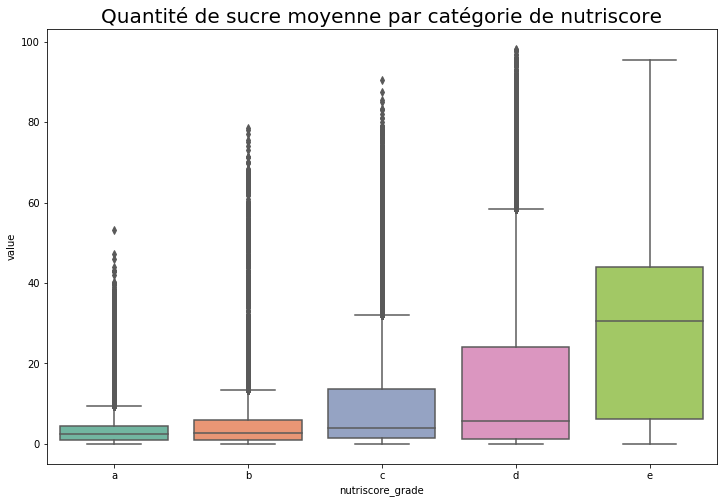

In [321]:
d_melt=pd.melt(df,id_vars=['nutriscore_grade'],value_vars=['sugars_100g'])
d_melt.drop(columns=['variable'])
(fig, ax) = plt.subplots(figsize=(12, 8))
ax.set_title("Quantité de sucre moyenne par catégorie de nutriscore",fontsize=20)
ax.set(xlabel="nutriscore_grade", ylabel="Quantité (en g)")
sns.boxplot(x="nutriscore_grade", y="value", order=['a','b','c','d','e'],data=d_melt, palette="Set2") 
plt.show()

Nous allons maintenant effectuer une régression linéaire pour savoir si ces résultats sont statistiquement significatifs. 

In [206]:
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(nutriscore_grade)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(nutriscore_grade),2.514534e+07,4.0,29744.41864,0.0
Residual,7.667660e+07,362803.0,NaN,NaN


La p-value est inférieure à 0.05.

##### Variance expliquée selon catégories

Revenons sur les catégories les plus fréquentes et tentons de voir quelle est la variance expliquée pour chacune de ces catégories.

In [77]:
labels

['en:snacks',
 'en:biscuits',
 'en:frozen-desserts',
 'en:breads',
 'en:cheeses',
 'en:sauces',
 'en:frozen-foods',
 'en:cakes',
 'en:cereals-and-their-products',
 'en:chocolate-candies',
 'en:confectioneries',
 'en:yogurts',
 'en:pizzas',
 'en:biscuits-and-cakes',
 'en:soups',
 'en:pastries',
 'en:meals',
 'en:pastas',
 'en:beverages',
 'en:sausages',
 'en:prepared-meats',
 'en:salted-snacks',
 'en:dips',
 'en:dark-chocolates',
 'en:crackers',
 'en:breakfast-cereals',
 'en:canned-soups',
 'en:milks',
 'en:ice-creams',
 'en:corn-chips']

Nous calculons la variance expliquée pour chacune de ces catégories grâce à une régression linéaire.

In [78]:
results_categorie=[]
for cat in labels:
    dfcat=df[df['main_category']==cat]
    Y = np.matrix(dfcat['nutrition-score-fr_100g']).T
    X = dfcat.drop(columns=['nutrition-score-fr_100g','code','product_name','sodium_100g','main_category','nutriscore_grade'])
    X = X.copy() # On modifiera X, on en crée donc une copie
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
    results_categorie.append(result.rsquared)

In [85]:
results_df=pd.DataFrame(results_categorie)
results_label=pd.DataFrame(labels)
results_final=pd.concat([results_label,results_df],axis=1,ignore_index=True)
results_final.rename(columns={0:'categorie',1:'rsquared'},inplace=True)
results_final.sort_values(by=['rsquared'])

,categorie,rsquared
23,en:dark-chocolates,0.495015
18,en:beverages,0.496864
26,en:canned-soups,0.503165
25,en:breakfast-cereals,0.605352
9,en:chocolate-candies,0.611064
0,en:snacks,0.652459
4,en:cheeses,0.653201
17,en:pastas,0.688080
21,en:salted-snacks,0.693125
3,en:breads,0.703938


Nous observons que certaines catégories sont particulièrement bien adaptées à notre application (milk, frozen-desserts) et d'autres moins (dark-chocolates ou beverages) pour lesquelles les variables choisies sont insuffisantes. 

## [ANALYSE PCA ET CLUSTERING](#sommaire)<a class="anchor" id="5"></a>

Nous allons utiliser des ACPs pour évaluer les possibilités de clustering offertes par le jeu de données Open Fact Food. 

##### Analyse PCA appliquée au nutriscore 

In [255]:
varcat=['a','b','c','d','e']
sample_iter=[]
for i in varcat:
    cat=df[df['nutriscore_grade']==i]
    sample=cat.sample(400)
    sample_iter.append(sample)
datasample=pd.concat(sample_iter)
df1sample=datasample.drop(columns=['code','product_name','main_category','nutriscore_grade','sodium_100g'])
x=StandardScaler().fit_transform(df1sample)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
pca.explained_variance_ratio_

array([0.43753856, 0.21317494])

Cette PCA nous permet d'expliquer 62% de la variance avec deux composantes. Visualisons ces deux composantes sur un échantillon de 2000 entrées, avec 400 entrées pour chaque valeur du nutriscore. 

Nous pouvons visualiser le cercle de corrélation.

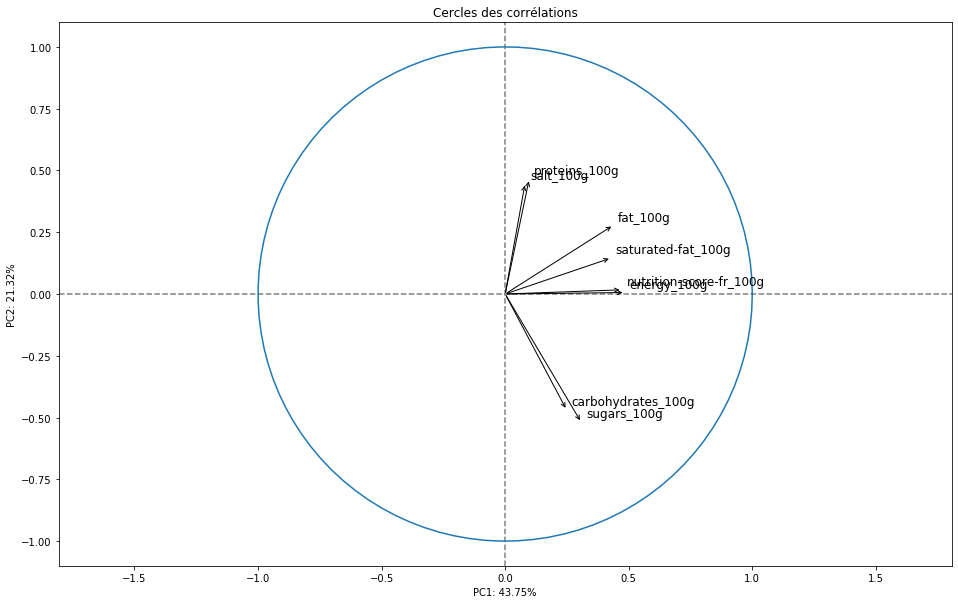

In [256]:
fig, ax = plt.subplots(figsize=(16, 10))

for i in range(len(pca.components_[0])):
        x = pca.components_[0,i]
        y = pca.components_[1,i]
        ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
        ax.annotate(df1sample.columns[i], (x+0.02,y+0.02), size=12)


ax.set_title('Cercles des corrélations')
ax.axhline(y=0, color="grey", linestyle="--")
ax.axvline(x=0, color="grey", linestyle="--")
ax.set_ylabel('PC2: {:.2%}'.format(float(pca.explained_variance_ratio_[1])))
ax.set_xlabel('PC1: {:.2%}'.format(float(pca.explained_variance_ratio_[0])))
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.show()

Intuitivement, nous pouvons supposer que la composante PC1 en abscisse nous informe sur les calories contenues dans le produit alors que la composante PC2 en ordonnée semble permettre de faire la distinction entre produits sucrés et produits salés. 

Regardons maintenant si la PCA permet avec 62% de variance expliquée de distinguer les différents nutriscores

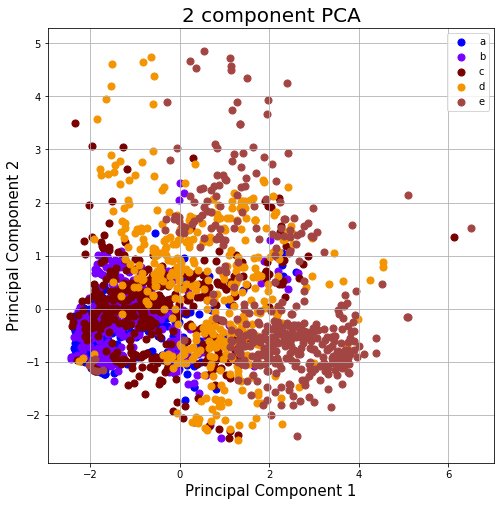

In [108]:
principalDf = pd.DataFrame(data = x_pca)
sampleindex=datasample['nutriscore_grade']
principalDf.reset_index(drop=True, inplace=True)
sampleindex.reset_index(drop=True, inplace=True)
finaldf = pd.concat([principalDf, sampleindex], axis = 1,ignore_index=True)
finaldf=finaldf[finaldf[1]<5]
finaldf.rename(columns={0:'PC1',
                          1:'PC2',
                          2:'Categorie'}, 
                 inplace=True)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = varcat
colors = ['#0000ff', '#7800ff', '#780000','#f39400','#a34543']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Categorie'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'PC1']
               , finaldf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Nous voyons que la PCA n'est pas très discriminante pour distinguer des entrées appartenant à des catégories de nutriscore différentes. Elle n'est notamment pas très utile pour distinguer les catégories A, B et C tandis que D et E sont mieux visibles. 

##### Analyse PCA appliquée aux catégories de produits

Utilisons une autre variable qualitative qui semble plus intéressante pour réaliser des clusterings, le 'main_category'. En effet, alors que différents types de produits peuvent être mauvais ou bon pour la santé, avec les labels nous pouvons avoir une idée plus précise du profil nutritionnel de chaque aliment. Vérifions cela avec une ACP.

In [285]:
varcat=['en:frozen-desserts','en:breads','en:biscuits','en:yogurts']
sample_iter=[]
for i in varcat:
    cat=df[df['main_category']==i]
    sample=cat.sample(250)
    sample_iter.append(sample)
datasample=pd.concat(sample_iter)
df1sample=datasample.drop(columns=['code','product_name','main_category','nutriscore_grade'])
x=StandardScaler().fit_transform(df1sample)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
pca.explained_variance_ratio_

array([0.47591204, 0.306035  ])

Nous observons qu'en effectuant une ACP sur certaines catégories de produits uniquement, la variance expliquée est très différente. Elle est ici de 83%. 

Visualisons le clustering obtenu grâce à cette ACP. 

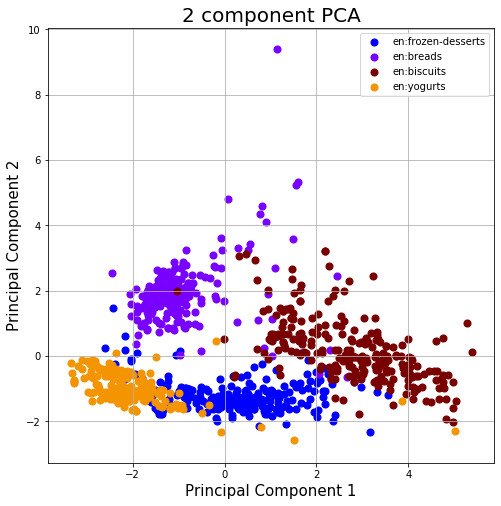

In [286]:
principalDf = pd.DataFrame(data = x_pca)
sampleindex=datasample['main_category']
principalDf.reset_index(drop=True, inplace=True)
sampleindex.reset_index(drop=True, inplace=True)
finaldf = pd.concat([principalDf, sampleindex], axis = 1,ignore_index=True)
finaldf=finaldf[finaldf[1]<10]
finaldf.rename(columns={0:'PC1',
                          1:'PC2',
                          2:'Categorie'}, 
                 inplace=True)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = varcat
colors = ['#0000ff', '#7800ff', '#780000','#f39400']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Categorie'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'PC1']
               , finaldf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Nous pouvons voir que la PCA nous permet de distinguer assez bien certaines catégories de produits différents. Une piste à explorer serait de voir regrouper les catégories de produits en fonction de leur position dans ce plan de projection à deux composants. Nous pourrions ainsi diminer de beaucoup le nombre de catégories différentes tout en gardant les différences qui nous intéressent. 